In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\Ironhack\DATA_CLASSES\IRONHACK-DATA-ANALYSIS\MATERIAL AULA JUPYTER NB\data\\asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@Default.csv', index_col=0)

df['default_binary'] = df.default.apply(lambda x : 1 if x == "Yes" else 0)

In [5]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Classification in ML

## Logistic Regression

### Why not linear regression?

- 1st reason: Imagine you are trying to predict medical condition on a multilabel setup:

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if pneumonia}  \\
      1 & \text{if respiratory disease}\\
      2 & \text{if covid}
    \end{cases}       
\end{equation}

Using this coding implies an orderring on the outcomes. Not only that, it implies that the distance between `pneumonia` to `respiratory disease` is the same as from `respiratory disease` to `covid`. Also, changing the order would reasonably affect the linear regression obtained.

## For binary cases, then?

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if not pneumonia}  \\
      1 & \text{if pneumonia}
    \end{cases}       
\end{equation}

In [6]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


C:\Users\Rfbj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='income'>

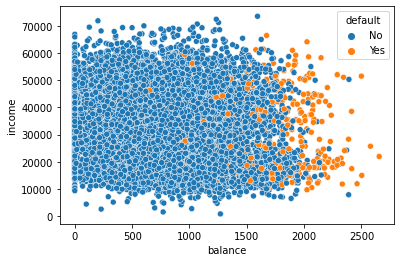

In [7]:
sns.scatterplot('balance','income',hue='default', data=df, palette='tab10')

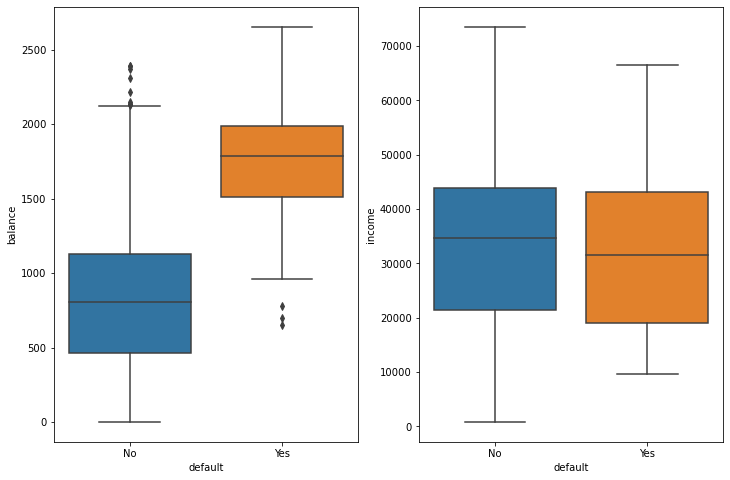

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x='default', y='balance', data=df, ax=ax[0])
sns.boxplot(x='default', y='income', data=df, ax=ax[1])


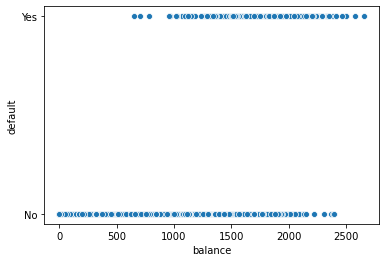

In [13]:
sns.scatterplot(x='balance',y='default', data=df)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [15]:
lr.fit(X=df[['balance']], y=df['default_binary'])

LinearRegression()

In [16]:
predictions = lr.predict(df[['balance']])

In [17]:
predictions

array([ 0.01955324,  0.03093704,  0.06423221, ...,  0.03460354,
        0.12857867, -0.04909776])

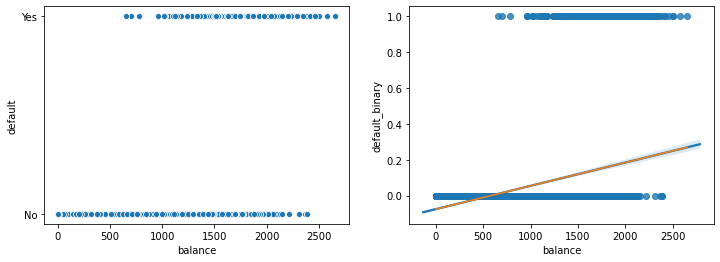

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x='balance',y='default', data=df, ax=ax[0])

sns.regplot(x='balance',y='default_binary', data=df, ax=ax[1])
sns.lineplot(x=df.balance, y=predictions, ax=ax[1])

- Predictions may be out of range.
- But yeah, the predictions will be ordered.
- Problem is - this approach cannot be extended to qualitative responses containing more than two levels.

# Logistic Regression

Rather than predicting the `target` directly, `logistic regression` tries to model the <b>`probability`</b> that your `target` belongs to a particular category.

Text(0.5, 1.0, 'Logistic Regression')

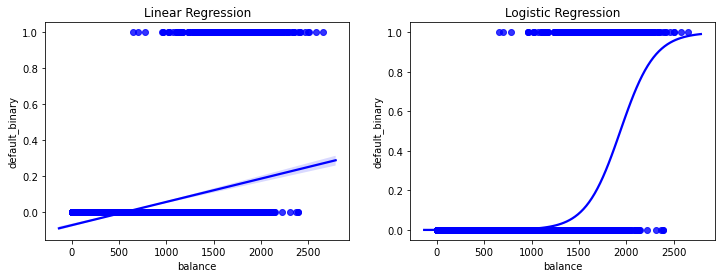

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x='balance',y='default_binary', data=df,color='blue', ax=ax[0], )
#sns.scatterplot(x='balance',y='default_binary', data=df, color='blue', ax=ax[1], alpha=0.3)
sns.regplot(x='balance',y='default_binary', data=df, logistic=True, color='blue', ci=None, ax=ax[1])

ax[0].set_title('Linear Regression')
ax[1].set_title('Logistic Regression')

S-shaped curve.

$$ \frac{e^{x}}{(1+e^{x})} $$

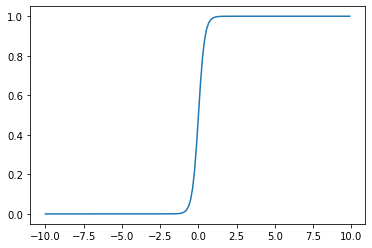

In [28]:
x = np.arange(-10, 10, 0.13)

plt.plot(x, np.exp(5*x)/(1 + np.exp(5*x)))


## Linear Regression
If we were to use a linear regression, the equation would be:

$$ y = P(default=Yes | balance) = a_0 + a_1\cdot balance $$

## Logistic Regression
The logistic regression seeks to model the probability in a better way:

$$ P(default=Yes | balance) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$



# In Python

In [29]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [30]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X=df[['balance']], y=df['default_binary'])
predictions = logistic.predict(df[['balance']])

In [33]:
df['default_binary']

1        0
2        0
3        0
4        0
5        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Name: default_binary, Length: 10000, dtype: int64

In [32]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [578]:
logistic.score(df[['balance']], df['default_binary'])

0.9725

In [36]:
df.default_binary.value_counts()

0    9667
1     333
Name: default_binary, dtype: int64

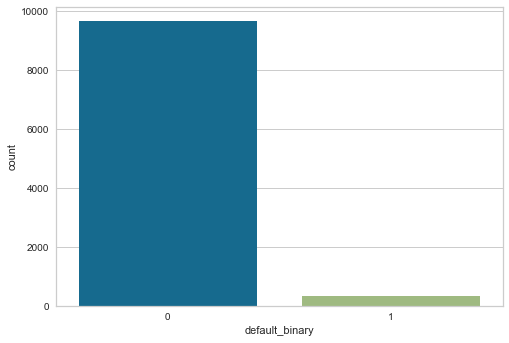

In [580]:
sns.countplot(df.default_binary)

In [581]:
df.default_binary.value_counts(normalize=True)

0    0.9667
1    0.0333
Name: default_binary, dtype: float64

In [38]:
logistic.intercept_

array([-10.65132824])

In [39]:
logistic.coef_

array([[0.00549892]])

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X, y)

$$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$


## Odds - the chances

$$ \left(\frac{P(default)}{1 - P(default)}\right) = e^{a_0 + a_1\cdot x}$$

1 in 5 people is a fraudster.

P = 1/5 = 0.2

Odds = $\frac{0.2}{0.8} = 1/4 = 0.25$

Odds: $\frac{\text{favorable events}}{\text{unfavorable events}}$, Probability: $\frac{\text{favorable events}}{\text{total events}}$

## Log Odds

$$ log\left(\frac{P(default)}{1 - P(default)}\right) = a_0 + a_1x$$

Remember that for **Linear Regression**, the value a_1, the coefficient, can be understood as how much of our target change if we change 1 unit in `x`. That is, if we change 1 in `x`, our target changes by $a_1$

For **Logistic Regression**, though, increasing X by one unit affects the **log odds** in $a_1$. So, although increasing `x` indeed increases the probability P, the value it will increase depends on X.


# The Loss function of the Logistic Regression

What does the logistic regression tries to minimize? 

Intuitively, we want to assign more punishment when predicting 1 while the actual is 0 and when predict 0 while the actual is 1.

\begin{equation}
  Cost(\hat{p}, y_{obs}) =
    \begin{cases}
      -log(\hat{p}) & \text{if } y_{obs} = 1  \\
      -log(1-\hat{p}) & \text{if } y_{obs} = 0\\
    \end{cases}       
\end{equation}



$$Cost(\hat{p}, y_{obs}) = -y_{obs} \cdot log(\hat{p}) - (1 - y_{obs})\cdot log(1-\hat{p})$$

$\hat{p}$ is my estimated probability, and $y_{obs}$ is the label of my observation.

So let's understand what this `cost function` represents:
- Imagine I have an observation whose true default label is 0 ($y_{obs}$ = 0) and my model predicts that the probability of its value being 1 (default) is 80%. We would have:
    
    - $cost(0.8, 0) = -0 \cdot log(0.8) - 1 \cdot log(1-0.8) = -log(0.2) \approx 1.6$

Now if we say that the probability of it being 1 is 90%:
- $cost(0.9, 0) = -0 \cdot log(0.9) - 1 \cdot log(1-0.9) = -log(0.1) \approx 2.3$

Now if we say that the probability of it being 1 is 95%:
- $cost(0.95, 0) = -0 \cdot log(0.95) - 1 \cdot log(1-0.95) = -log(0.05) \approx 3$

Text(0.5, 0, 'Probability of y = 1')

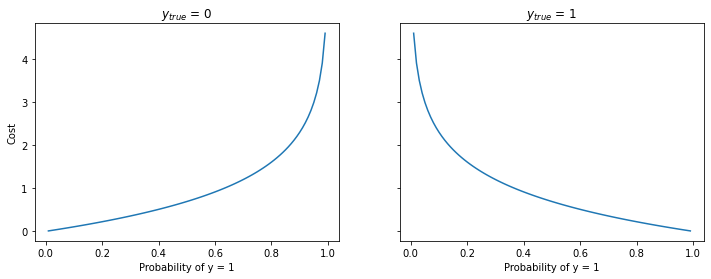

In [44]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,4))
y_obs = 0
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[0].plot(p, cost)

y_obs = 1
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[1].plot(p, cost)

ax[0].set_title('$y_{true}$ = 0')
ax[1].set_title('$y_{true}$ = 1')

ax[0].set_ylabel('Cost')

ax[0].set_xlabel('Probability of y = 1')
ax[1].set_xlabel('Probability of y = 1')


Thus, it penalizes when you are sure it is one, but you are wrong. Or it penalizes when you are sure it is zero, but you are wrong, the true label is one.

So this is what logistic regression tries to minimize. Two important summaries:

- The results of the logistic regression are <b>probabilities</b> of being the label 1.
- As it minimizes that cost function, <b>you can be very confident of observations predicted with probabilities close to 1 or close to 0</b>. They will probably not be wrong because your model tried to avoid it during training.

# In Python

In Python, as soon as you `.fit()` your logistic regression, you'll be able to run the `.predict_proba()` method.

In [45]:
logistic.predict(df[['balance']])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
logistic.predict_proba(df[['balance']])

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

This will display the probabilities of being 0 (the first column of the result) and the probabilities of being one.

In [586]:
logistic.predict_proba(df[['balance']])[:, 1]

array([1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
       2.46651596e-03, 1.16759635e-01, 7.14476480e-05])

In [269]:
# !pip install --upgrade mlxtend

In [47]:
from mlxtend.plotting import plot_decision_regions

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


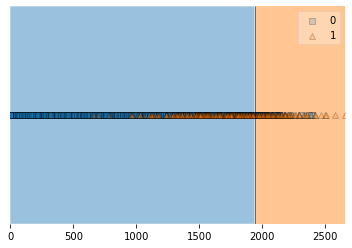

In [48]:
plot_decision_regions(np.array(df[['balance']]), 
                      np.array(df['default_binary']), 
                      logistic, scatter_kwargs={'alpha':0.2})

In [77]:
logistic.predict_proba(pd.DataFrame([1933],columns=['balance']))[:, 1]*1000

array([494.51909859])

# Another Example - More than 1 dimension

In [59]:
from sklearn import datasets 

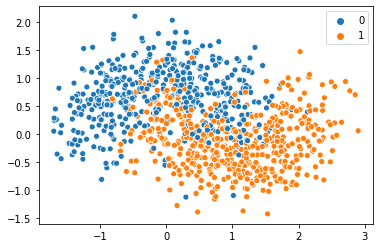

In [60]:
X, y = datasets.make_moons(n_samples=1000, noise=0.4)

sns.scatterplot(X[:,0], X[:,1], hue=y, palette='tab10')

In [61]:
X

array([[ 1.49990158,  0.64380147],
       [ 0.89255682,  0.12771697],
       [-0.56328694,  0.4942903 ],
       ...,
       [ 0.70060342,  1.3194944 ],
       [ 0.52792103, -0.82493883],
       [-0.77323494,  1.16861557]])

In [62]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression()

In [63]:
logistic_regression.coef_

array([[ 1.29056425, -2.54508779]])

In [64]:
logistic_regression.intercept_

array([0.0666446])

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


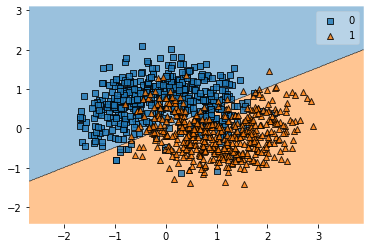

In [65]:
plot_decision_regions(X, y, logistic_regression)

In [66]:
# https://stats.stackexchange.com/questions/246489/slope-and-intercept-of-the-decision-boundary-from-a-logistic-regression-model
slope = logistic_regression.coef_[0][0]/(-logistic_regression.coef_[0][1]) 
# -b1/b2 --> slope

intercept = logistic_regression.intercept_[0]/(-logistic_regression.coef_[0][1]) 
# b0/b2 --> intercept

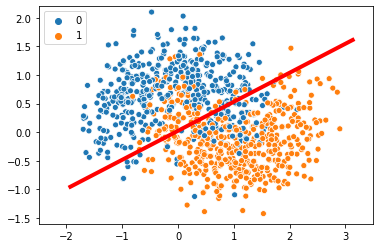

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.scatterplot(X[:,0], X[:,1], hue=y, ax=ax1, palette='tab10')

x_min, x_max = ax1.get_xlim()
ax1.plot([x_min, x_max], [x_min*slope+intercept, x_max*slope+intercept], '-r', lw=4)
ax1.set_xlim([-2.5,3.5])
ax1.set_ylim([-1.6, 2.2])
plt.show()

In [69]:
logistic_regression.coef_

array([[ 1.29056425, -2.54508779]])

In [71]:
X = df[['balance','income']]
y = df['default_binary']

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [72]:
model.coef_

array([[5.64710797e-03, 2.08091984e-05]])

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


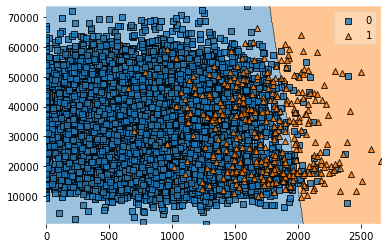

In [75]:
plot_decision_regions(np.array(X), np.array(y), model)